In [2]:
from stock_data import Stock
import statsmodels.tsa.stattools as stattools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


This file uses ticker_data from Quant connect. The data is assumed to be stored in a folder 'S&P500_3monthdata/ticker_breakdown' in the root directory.
Specify Stock. DATA_FOLDER = <new_folder> to change this folder.


In [44]:
BY_INDUSTRY = Stock.all_by_industry()
INDUSTRIES = BY_INDUSTRY.keys()

In [46]:
energy_stocks = BY_INDUSTRY["Energy"]
energy_stocks_5min = [stock.five_minute() for stock in energy_stocks]
energy_stocks_30min = [stock.any_minute(30) for stock in energy_stocks]

# Calculating pvalues for 5 min data over 1.5 months (half the time period)

In [47]:
cointegration_data = energy_stocks_5min
time_length = cointegration_data[0].shape[0]

## Only testing over half the time interval so we can get an initial feel for the data,
## and then do qualitative analysis before a quantitative check on the whole range.
cutoff = int(time_length/2)

In [48]:
p_values = np.zeros((len(cointegration_data), len(cointegration_data)))

In [49]:
for i in range(len(cointegration_data)):
    p_values[i,i] = 1

for stock1_index in range(len(cointegration_data)): # Looping through all stocks
    for stock2_index in range(stock1_index+1, len(cointegration_data)): # Looping from stock1_index to the end
        
        # Getting the pair of stocks over half the total time period
        both_stock_data = [cointegration_data[stock1_index][cutoff:],
                           cointegration_data[stock2_index][cutoff:]]
        
        _, p_value, _ =stattools.coint(both_stock_data[0]["price"], both_stock_data[1]["price"])
        
        p_values[stock1_index, stock2_index] = p_value
        p_values[stock2_index, stock1_index] = p_value


In [50]:
delta = p_values_5min-p_values

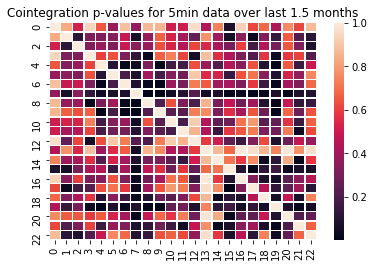

In [51]:
import seaborn as sns

ax = sns.heatmap(p_values_5min, linewidth=0.5)
ax.set_title("Cointegration p-values for 5min data over last 1.5 months")
plt.show()

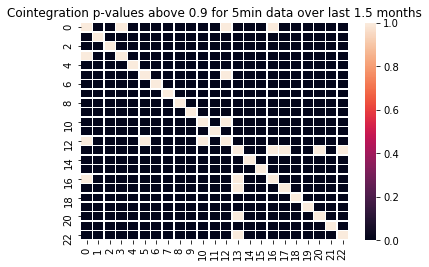

In [52]:
thresh = 0.90

above_thresh = np.zeros_like(p_values_5min)
above_thresh[p_values_5min >= thresh] = 1

ax = sns.heatmap(above_thresh, linewidth=0.5)
ax.set_title(f"Cointegration p-values above {thresh} for 5min data over last 1.5 months")
plt.show()

In [32]:
energy_stocks[7].name

'EOG'

In [57]:
stock_list = []
for row_index in range(len(above_thresh)):
    for col_index in range(row_index + 1, len(above_thresh[0])):
        if (above_thresh[row_index, col_index]==False): # Skipping all entries that have low p_value
            continue
        stock1, stock2 = energy_stocks[row_index].name, energy_stocks[col_index].name
        
        if stock1 not in stock_list:
            stock_list.append(stock1)
        if stock2 not in stock_list:
            stock_list.append(stock2)
            
        print(f"{stock1}~{stock2}")
        


APA~CVX
APA~KMI
APA~OXY
DVN~KMI
HES~KMI
MRO~OXY
MRO~OKE
MRO~SLB
MRO~WMB


In [59]:
(",").join(stock_list)

'APA,CVX,KMI,OXY,DVN,HES,MRO,OKE,SLB,WMB'

In [ ]:
for stock in energy_stocks:
    data = stock.five_minute()
    plt.plot(data["time"],data["price"])
plt.show()

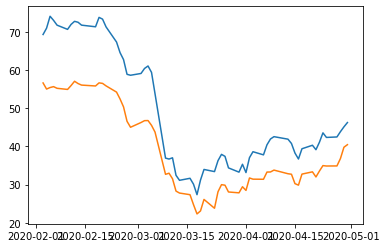

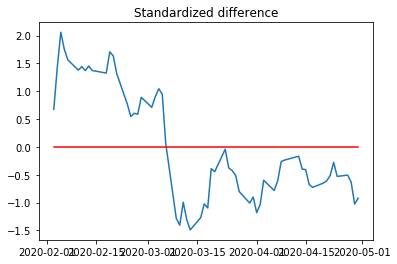

In [22]:
plot_stocks = [Stock("EOG"), Stock("COP")]
plot_stocks_daily = [stock.any_minute(24*60) for stock in plot_stocks]

plt.plot(plot_stocks_daily[0]["time"], plot_stocks_daily[0]["price"])
plt.plot(plot_stocks_daily[1]["time"], plot_stocks_daily[1]["price"])
plt.show()

price_data = [data["price"] for data in plot_stocks_daily]
delta = price_data[0]-price_data[1]
z_delta = (delta-delta.mean())/np.std(delta)
plt.plot(plot_stocks_daily[1]["time"], z_delta)
plt.plot(plot_stocks_daily[1]["time"], np.zeros_like(z_delta), color="red")
plt.title("Standardized difference")
plt.show()